In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as px
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson, expon


### Simulaciones


#### Cramber lumberg
Probabilidad ruina horizonte finito, tiempo discreto

$X(t) = u + ct - \sum_{k=1}^{N(t)}Z_k$

In [2]:
def get_claim_sum(mu, lam):
    N = poisson.rvs(mu=mu, size=1)
    return sum(expon.rvs(scale = lam, size=N))   

Prima: $c > \lambda \mu\\$
Teneindo en cuenta un 20% arriba la prima, de manera arbitraria


In [3]:
c = 74 * 30717 * 1.2
print('prima: ', c)

prima:  2727669.6


(array([476., 260., 136.,  67.,  27.,  19.,   5.,   5.,   2.,   3.]),
 array([30717.00114975, 30717.69195751, 30718.38276527, 30719.07357303,
        30719.76438079, 30720.45518854, 30721.1459963 , 30721.83680406,
        30722.52761182, 30723.21841958, 30723.90922734]),
 <BarContainer object of 10 artists>)

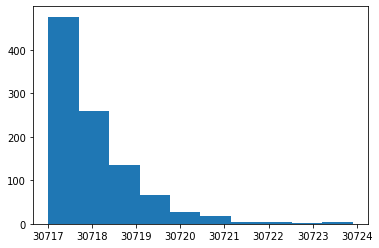

In [446]:
e = expon.rvs(30717, size=1000)
plt.hist(e)

(array([ 14.,  30.,  97., 160., 205., 231., 145.,  78.,  26.,  14.]),
 array([30253.98076058, 30349.55028523, 30445.11980987, 30540.68933452,
        30636.25885916, 30731.82838381, 30827.39790846, 30922.9674331 ,
        31018.53695775, 31114.10648239, 31209.67600704]),
 <BarContainer object of 10 artists>)

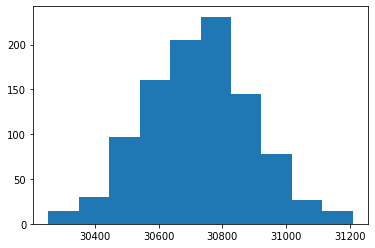

In [447]:
g = gamma.rvs(30717, size=1000)
plt.hist(g)

In [4]:
def CramerLundberg(u, c, time_N):
    u_0 = u
    U_t = []
    u_1 = 0

    for i in range(time_N):
        U_t.append(u_0)
        u_1 = u_0 + c
        u_0 = u_1 - get_claim_sum(74, 30717)

    return U_t

Simulación unitaria

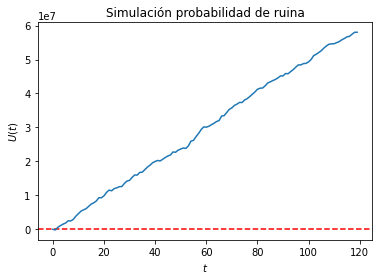

In [5]:
t = [i for i in range(120)]
Xi = CramerLundberg(0, c, 120)

#plt.figure(figsize=(40,10)) 
plt.axhline(y = 0, color ="red", linestyle ="--")
plt.plot(t, Xi)
plt.ylabel(r"$U(t)$")
plt.xlabel(r"$t$")
plt.title("Simulación probabilidad de ruina")
plt.show()

Modelo estacionario, Ley de los Grandes Números

In [6]:
def CL_estacionario(u, c ,time_N ,sim_n):
    #setter parametros
    ruinas = 0
    for j in range(sim_n):
        Xi = CramerLundberg(u, c, time_N)
    
        if min(Xi) < 0:
            ruinas += 1
        else:
            continue

    aproximacion = ruinas / sim_n

    print('Probabilidad estable de ruina: ', aproximacion)

Probabilidad para 50,000 iteraciones

In [6]:
CL_estacionario(0, c, 120, 50000)

Probabilidad estable de ruina:  0.1395


In [7]:
CL_estacionario(100000, c, 120, 50000)

Probabilidad estable de ruina:  0.09284


In [7]:
CL_estacionario(1000000, c, 120, 50000)

Probabilidad estable de ruina:  0.0013


Probabilidades para 10,000 iteraciones

In [469]:
CL_estacionario(0, c, 120, 10000)

Probabilidad estable de ruina:  0.1377


In [470]:
CL_estacionario(100000, c, 120, 10000)

Probabilidad estable de ruina:  0.0904


In [483]:
CL_estacionario(1000000, c, 120, 10000)

Probabilidad estable de ruina:  0.0012


Probabilidades para 5,000 iteraciones

In [495]:
CL_estacionario(0, c, 120, 5000)

Probabilidad estable de ruina:  0.1342


In [496]:
CL_estacionario(100000, c, 120, 5000)

Probabilidad estable de ruina:  0.095


In [497]:
CL_estacionario(1000000, c, 120, 5000)

Probabilidad estable de ruina:  0.0008


Probabilidades 1,000 iteraciones

In [487]:
CL_estacionario(0, c, 120, 1000)

Probabilidad estable de ruina:  0.17


In [488]:
CL_estacionario(100000, c, 120, 1000)

Probabilidad estable de ruina:  0.12


In [489]:
CL_estacionario(1000000, c, 120, 1000)

Probabilidad estable de ruina:  0.0


Probabilidades 50 iteraciones

In [35]:
CL_estacionario(0, c, 120, 50)

Probabilidad estable de ruina:  0.22


In [28]:
CL_estacionario(100000, c, 120, 50)

Probabilidad estable de ruina:  0.12


In [30]:
CL_estacionario(1000000, c, 120, 50)

Probabilidad estable de ruina:  0.0


Simulación de Monte Carlo

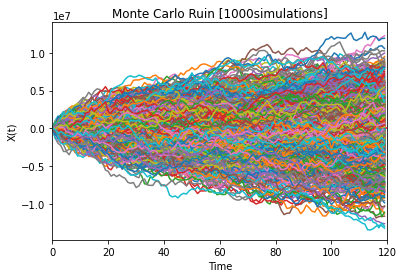

In [10]:
fig = plt.figure()
plt.title("Monte Carlo Ruin [" + str(1000) + "simulations]")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.xlim([0, 120])
plt.axhline(y = 0, color ="red", linestyle ="--")

for i in range(1000):
    Xi = CramerLundberg(0, 2273058, 120)
    
    plt.plot([i for i in range(120)], Xi)
    # Showing the plot after the simulations are finished
plt.show()

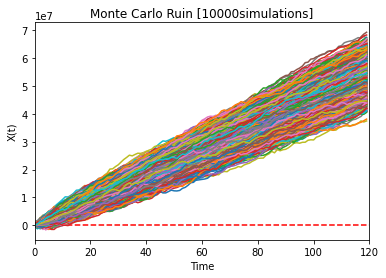

In [475]:
fig = plt.figure()
plt.title("Monte Carlo Ruin [" + str(10000) + "simulations]")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.xlim([0, 120])
plt.axhline(y = 0, color ="red", linestyle ="--")

for i in range(10000):
    Xi = CramerLundberg(0, c, 120)
    
    plt.plot([i for i in range(120)], Xi)
    # Showing the plot after the simulations are finished
plt.show()

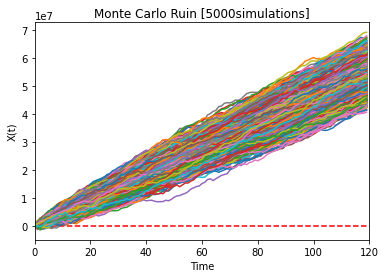

In [494]:
fig = plt.figure()
plt.title("Monte Carlo Ruin [" + str(5000) + "simulations]")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.xlim([0, 120])
plt.axhline(y = 0, color ="red", linestyle ="--")

for i in range(5000):
    Xi = CramerLundberg(0, c, 120)
    
    plt.plot([i for i in range(120)], Xi)
    # Showing the plot after the simulations are finished
plt.show()

Calculando los IC para la probabilidad de las n = 10,000 simulacones

In [66]:
data = []
ruinas = 0
for j in range(10000):
    Xi = CramerLundberg(0, c, 120)
    
    if min(Xi) < 0:
        ruinas += 1
    
    
    aproximacion = int(ruinas) / (j+1)
    data.append(aproximacion)

In [86]:
import math
def IC(ruina_MC, critic_value, n):
    min = ruina_MC - critic_value * math.sqrt((ruina_MC * (1 - ruina_MC)**2)/ n )
    max = ruina_MC + critic_value * math.sqrt((ruina_MC * (1 - ruina_MC)**2)/ n )
    return (min, max)

def IC_prob(prob, critic_value, n):
    min = prob - critic_value * math.sqrt((prob * (1 - prob)**2)/ n )
    max = prob + critic_value * math.sqrt((prob * (1 - prob)**2)/ n )
    return (min, max)

$\hat{\theta} - Z_{a/2} \sqrt{\frac{\hat{\theta}(1-\theta^2)}{n}}\le \theta\le \hat{\theta} + Z_{a/2} \sqrt{\frac{\hat{\theta}(1-\theta^2)}{n}}$

In [67]:
ruin_mean = np.mean(data)
print('Intervalos confianza: ', IC(0.1377, 2.58, ruin_mean, 10000))

Intervalos confianza:  (0.12257331500495894, 0.15282668499504104)


In [68]:
print('Margen error: ', 0.14468223199064595-0.13071776800935403)

Margen error:  0.013964463981291919


In [88]:
ruin_mu = [0.22,0.17,0.1342,0.1377,0.1395]
n_muestras = [50,1000,5000,10000,50000]
print(' n estimations:   Confident Intervals            |   Margen de Error\n=====================================================================')
for i in range(len(ruin_mu)):
    ic = IC(ruin_mu[i], 2.58, n_muestras[i])
    print(n_muestras[i], ":", ic , "    |", ic[1]-ic[0])

 n estimations:   Confident Intervals            |   Margen de Error
50 : (0.08651248543777584, 0.35348751456222416)     | 0.2669750291244483
1000 : (0.14207955993899812, 0.1979204400610019)     | 0.05584088012200378
5000 : (0.12262746392744614, 0.1457725360725539)     | 0.023145072145107748
10000 : (0.1294444680561874, 0.14595553194381258)     | 0.016511063887625188
50000 : (0.13579171860471742, 0.1432082813952826)     | 0.007416562790565184


# Ruin

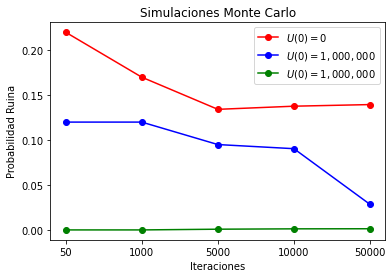

In [56]:
# just for Monte Carlo
fig = plt.figure()
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad Ruina")

#plt.axhline(y = 0.8158, color ="red", linestyle ="--")
#plt.axhline(y = 0.28, color ="blue", linestyle ="--")
#plt.axhline(y = 0.00003452, color ="green", linestyle ="--")
plt.plot(['50','1000','5000','10000','50000'],[0.22,0.17,0.1342,0.1377,0.1395], color = "r", linestyle ="-", marker = 'o')
plt.plot(['50','1000','5000','10000','50000'],[0.12,0.12,0.095,0.0904,0.0284], color = "b", linestyle ="-", marker = 'o')
plt.plot(['50','1000','5000','10000','50000'],[0,0,0.0008,0.0012,0.0013], color = "g", linestyle ="-", marker = 'o')
plt.legend(['$U(0) = 0$', '$U(0) = 1,000,000$', '$U(0) = 1,000,000$'])
plt.title('Simulaciones Monte Carlo')
plt.show()

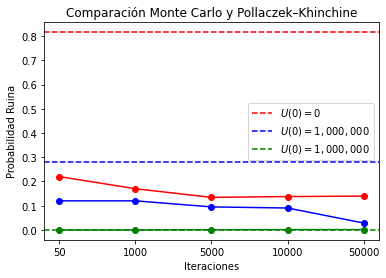

In [85]:
#para monte carlo y pollazckeck chinckin

fig = plt.figure()
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad Ruina")

plt.axhline(y = 0.8158, color ="red", linestyle ="--")
plt.axhline(y = 0.28, color ="blue", linestyle ="--")
plt.axhline(y = 0.00003452, color ="green", linestyle ="--")
plt.plot(['50','1000','5000','10000','50000'],[0.22,0.17,0.1342,0.1377,0.1395], color = "r", linestyle ="-", marker = 'o')
plt.plot(['50','1000','5000','10000','50000'],[0.12,0.12,0.095,0.0904,0.0284], color = "b", linestyle ="-", marker = 'o')
plt.plot(['50','1000','5000','10000','50000'],[0,0,0.0008,0.0012,0.0013], color = "g", linestyle ="-", marker = 'o')
plt.legend(['$U(0) = 0$', '$U(0) = 1,000,000$', '$U(0) = 1,000,000$'])
plt.title('Comparación Monte Carlo y Pollaczek–Khinchine')
plt.show()